# Statement Of Purpose:

The purpose of this regression model is to analyze and forecast the Furnace [kW] consumption based on the given dataset. By creating a linear regression model and training it on the dataset, we can predict the Furnace [kW] consumption in the future based on other features like temperature, humidity, visibility, apparent temperature, pressure, wind speed, cloud cover, wind bearing, precip intensity, dew point, and precip probability. This model can be useful for energy management companies and homeowners who want to optimize their energy consumption by predicting the Furnace [kW] usage in advance. The model's accuracy can be improved by fine-tuning the features and hyperparameters and by incorporating other time series forecasting techniques like seasonal decomposition and smoothing techniques.


# DataSet:

Reading a CSV file containing attributes such as time, temperature, Furnace, humidity, visibility and more.

The attribute "precipProbability" is the dependent attribute in our dataset.

We start by importing all the required libraries for this project. We will be using Pandas for data handling and manipulation, NumPy for mathematical computations, Matplotlib for visualizations, Statsmodels for time series analysis and forecasting, and Scikit-learn for evaluating the model's performance.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis:

## Reading the dataset into Pandas Dataframe

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\furnace_consumption.csv")

dataset = pd.DataFrame(data)
dataset.head()

,time,Furnace [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.082617,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.084533,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.083017,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,0.175417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,0.300917,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


As we can see, the value in the time column 1451624400 and so on, is a Unix timestamp, which represents the number of seconds that have elapsed since January 1, 2016, 00:00:00 UTC.

We will have to convert it to a datetime object in Python using the datetime module.

In [3]:
for i in range(len(dataset)):
    timestamp = dataset.loc[i, 'time']
    dt_object = datetime.fromtimestamp(timestamp)
    dataset.loc[i, 'time'] = dt_object

In [4]:
dataset.head()

,time,Furnace [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 10:00:00,0.082617,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,2016-01-01 10:00:01,0.084533,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,2016-01-01 10:00:02,0.083017,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,2016-01-01 10:00:03,0.175417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,2016-01-01 10:00:04,0.300917,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


The main function of the code below is to check for correlation between features in the data. It is essential to check for correlation before building the model, as highly correlated features can lead to poor model performance.

# Split data into train, test and safe

In [5]:
train, temp = train_test_split(data, train_size = 0.75, random_state = 570)
train.head()

,time,Furnace [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
304599,2016-01-04 22:36:39,0.625483,67.69,clear-day,0.82,9.69,Clear,67.69,1010.47,2.36,0.07,263.0,0.0,62.01,0.0
19266,2016-01-01 15:21:06,0.264783,24.29,clear-night,0.68,10.00,Clear,20.22,1014.62,3.24,0.15,201.0,0.0,15.19,0.0
260097,2016-01-04 10:14:57,0.086333,77.04,clear-night,0.63,10.00,Clear,77.04,1007.85,5.32,0.02,269.0,0.0,63.57,0.0
323674,2016-01-05 03:54:34,0.627633,69.89,clear-night,0.87,10.00,Clear,69.89,1012.95,3.67,0.2,145.0,0.0,65.96,0.0
367783,2016-01-05 16:09:43,0.222483,76.92,clear-day,0.49,10.00,Clear,76.92,1021.59,5.06,0.08,175.0,0.0,56.39,0.0


In [6]:
safe, test = train_test_split(temp, test_size = 0.6, random_state = 570)
test.head()

,time,Furnace [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
30583,2016-01-01 18:29:43,0.726667,21.60,clear-night,0.54,10.00,Clear,12.34,1021.97,7.79,0.02,20.0,0.0000,7.75,0.0
336100,2016-01-05 07:21:40,0.088617,59.97,clear-day,0.84,9.92,Clear,59.97,1022.30,3.47,0.07,355.0,0.0000,55.14,0.0
209271,2016-01-03 20:07:51,0.088067,64.46,rain,0.91,5.70,Light Rain,64.46,1015.62,1.64,0.0,32.0,0.0194,61.85,0.6
205292,2016-01-03 19:01:32,0.088350,80.93,clear-day,0.52,10.00,Clear,81.94,1017.37,6.97,0.19,170.0,0.0000,61.73,0.0
106128,2016-01-02 15:28:48,0.255600,42.22,fog,0.95,0.98,Foggy,39.80,1010.06,4.09,0.0,193.0,0.0000,40.95,0.0


# Correlation between the columns of the dataset

In [7]:
dataset.corr()

,Furnace [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
Furnace [kW],1.000000,-0.354495,-0.076158,-0.015179,-0.366052,-0.029501,0.123687,0.043819,0.019622,-0.355363,-0.001671
temperature,-0.354495,1.000000,-0.070020,0.096051,0.993618,-0.166106,-0.062197,-0.035770,0.041200,0.881637,0.038872
humidity,-0.076158,-0.070020,1.000000,-0.492113,-0.030046,-0.131721,-0.437480,-0.234946,0.232332,0.400028,0.315321
visibility,-0.015179,0.096051,-0.492113,1.000000,0.084156,0.170698,0.161095,0.181631,-0.405611,-0.111802,-0.485779
apparentTemperature,-0.366052,0.993618,-0.030046,0.084156,1.000000,-0.147995,-0.126527,-0.054636,0.044311,0.892529,0.043225
pressure,-0.029501,-0.166106,-0.131721,0.170698,-0.147995,1.000000,-0.240489,-0.151945,-0.178691,-0.218494,-0.242966
windSpeed,0.123687,-0.062197,-0.437480,0.161095,-0.126527,-0.240489,1.000000,0.197979,-0.002481,-0.245049,-0.013058
windBearing,0.043819,-0.035770,-0.234946,0.181631,-0.054636,-0.151945,0.197979,1.000000,-0.095153,-0.135665,-0.136149
precipIntensity,0.019622,0.041200,0.232332,-0.405611,0.044311,-0.178691,-0.002481,-0.095153,1.000000,0.136836,0.785384
dewPoint,-0.355363,0.881637,0.400028,-0.111802,0.892529,-0.218494,-0.245049,-0.135665,0.136836,1.000000,0.171057



## Checking for attriubutes read as objects in the DataFrame

We'll use the ".info()" method to see how python is thinking about the features of our dataset (numeric versus categorical). We can also use the ".isna().sum()" chain to determine if and where missing values exist. 



In [8]:
dataset.info()
dataset=dataset.dropna()
print("\n\n")
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444160 entries, 0 to 444159
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 444160 non-null  object 
 1   Furnace [kW]         444160 non-null  float64
 2   temperature          444159 non-null  float64
 3   icon                 444159 non-null  object 
 4   humidity             444159 non-null  float64
 5   visibility           444159 non-null  float64
 6   summary              444159 non-null  object 
 7   apparentTemperature  444159 non-null  float64
 8   pressure             444159 non-null  float64
 9   windSpeed            444159 non-null  float64
 10  cloudCover           444159 non-null  object 
 11  windBearing          444159 non-null  float64
 12  precipIntensity      444159 non-null  float64
 13  dewPoint             444159 non-null  float64
 14  precipProbability    444159 non-null  float64
dtypes: float64(11), o

time                   0
Furnace [kW]           0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

The above results of the code view the relationship between the features of the data. A coefficient of 1 means that the features are positively correlated, while a coefficient of -1 means that the features are negatively correlated. The 0 coefficient means there is no correlation.

In [9]:
dataset.drop(labels = ['windSpeed','icon','summary','cloudCover','windBearing', 'precipIntensity'], axis=1, inplace=True)
dataset.head()

,time,Furnace [kW],temperature,humidity,visibility,apparentTemperature,pressure,dewPoint,precipProbability
0,2016-01-01 10:00:00,0.082617,36.14,0.62,10.0,29.26,1016.91,24.4,0.0
1,2016-01-01 10:00:01,0.084533,36.14,0.62,10.0,29.26,1016.91,24.4,0.0
2,2016-01-01 10:00:02,0.083017,36.14,0.62,10.0,29.26,1016.91,24.4,0.0
3,2016-01-01 10:00:03,0.175417,36.14,0.62,10.0,29.26,1016.91,24.4,0.0
4,2016-01-01 10:00:04,0.300917,36.14,0.62,10.0,29.26,1016.91,24.4,0.0


# Joining Data

In [10]:
temperature_pd = pd.DataFrame({
    'Temperature': ["36.14", "35.87", "35.4", "35.25", "34.99"],
    'apparentTemperature': ["29.26", "29.4", "28.87", "30.51", "29.79"]
})

print(temperature_pd)

  Temperature apparentTemperature
0       36.14               29.26
1       35.87                29.4
2        35.4               28.87
3       35.25               30.51
4       34.99               29.79


In [11]:
time_pd = pd.DataFrame({
  'temperature': ['36.14', '35.87', '35.4'],
    'apparentTemperature': ['29.26', '29.4', '30.51'],
    'summary': ['Clear', 'Mostly Cloudy', 'Partly Cloudy']
})

print(time_pd)

  temperature apparentTemperature        summary
0       36.14               29.26          Clear
1       35.87                29.4  Mostly Cloudy
2        35.4               30.51  Partly Cloudy


In [12]:
time_pd.merge(time_pd, how = "left", on ="apparentTemperature")

,temperature_x,apparentTemperature,summary_x,temperature_y,summary_y
0,36.14,29.26,Clear,36.14,Clear
1,35.87,29.4,Mostly Cloudy,35.87,Mostly Cloudy
2,35.4,30.51,Partly Cloudy,35.4,Partly Cloudy


# Data Visualization

### We start our exploratory data analysis by plotting the Furnace [kW] column over time using Matplotlib. This plot will give us an idea about the overall trend of the Furnace [kW] values.

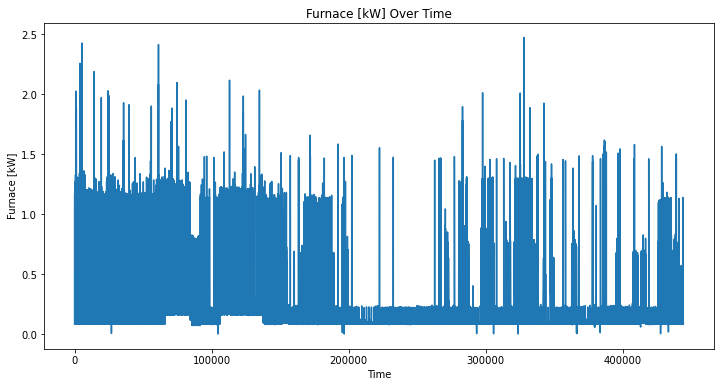

In [13]:
# Plot the Furnace [kW] column
plt.figure(figsize=(12,6))
plt.plot(dataset['Furnace [kW]'])
plt.title('Furnace [kW] Over Time')
plt.xlabel('Time')
plt.ylabel('Furnace [kW]')
plt.show()


# Regression Based Forecasting

### To capture the general trend of the Furnace [kW] values, we can calculate the rolling mean over a window of 30 days using the rolling() and mean() functions from Pandas. We then plot the original Furnace [kW] column and the rolling mean using Matplotlib.

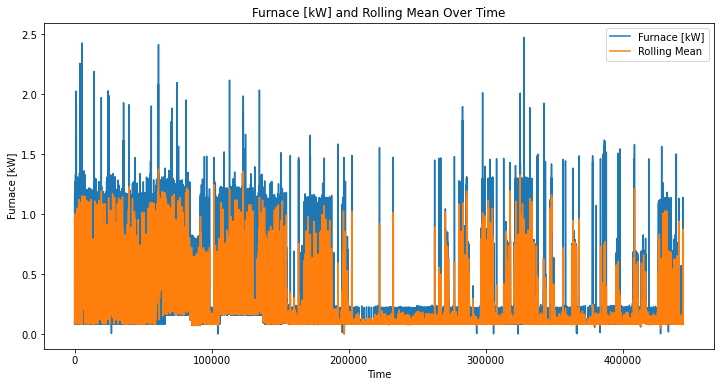

In [14]:
# Calculate the rolling mean of Furnace [kW] over a window of 30 days
rolling_mean = dataset['Furnace [kW]'].rolling(window=30).mean()

# Plot the original Furnace [kW] column and the rolling mean
plt.figure(figsize=(12,6))
plt.plot(dataset['Furnace [kW]'], label='Furnace [kW]')
plt.plot(rolling_mean, label='Rolling Mean')
plt.title('Furnace [kW] and Rolling Mean Over Time')
plt.xlabel('Time')
plt.ylabel('Furnace [kW]')
plt.legend()
plt.show()


# Seasonal Decomposition

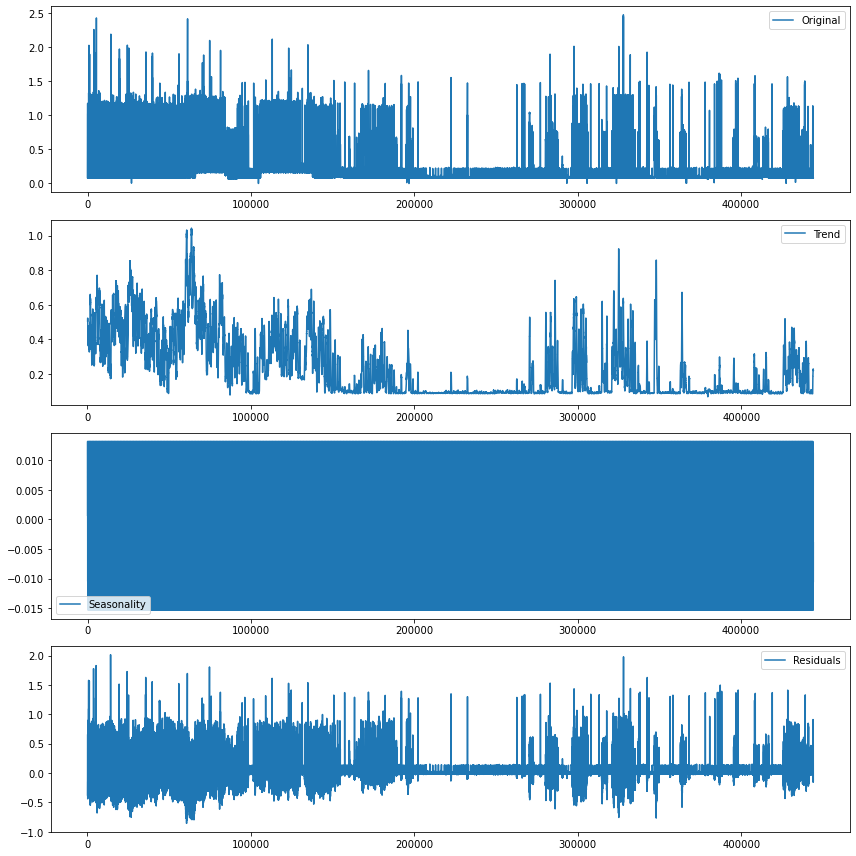

In [15]:
# Perform additive seasonal decomposition
result_add = seasonal_decompose(dataset['Furnace [kW]'], model='additive', period=365)

# Plot the original Furnace [kW] column, the trend, seasonal, and residual components
plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
plt.plot(dataset['Furnace [kW]'], label='Original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(result_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(result_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(result_add.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout() # Ensure the plots don't overlap
plt.show() # Show the plot


# Building a Model Compensating for Seasonality

Seasonality is a common pattern observed in many time series data where a particular pattern repeats over regular intervals of time. For example, sales of winter clothes are usually higher in the winter season and lower in the summer season. Seasonality can have a significant impact on the forecasted values, and hence, it is essential to account for seasonality when building time series models.

There are different methods to account for seasonality, such as seasonal decomposition, seasonal ARIMA, and seasonal naive methods. Here, we will demonstrate seasonal decomposition using the statsmodels library.

### Seasonal Decomposition

Seasonal decomposition is a method that breaks down a time series into its underlying components: trend, seasonality, and residuals (or noise). Once the components are identified, we can remove the seasonality component and build a model on the remaining trend and residuals.

The statsmodels library provides a convenient way to perform seasonal decomposition using the seasonal_decompose function. This function takes in a time series and decomposes it into its trend, seasonal, and residual components.

# Model Construction

In this section, we will construct a linear model to predict the target variable based on the available predictor variables in our dataset. Our goal is to build a model that accurately predicts the target variable while being as simple as possible. We will use the Linear Regression model from the scikit-learn library to perform our modeling. Linear regression uses the relationship between the data-points to draw a straight line through all them. This line can be used to predict future values.

In [16]:
X = dataset.drop(labels=['Furnace [kW]','time'], axis=1)
Y = dataset['Furnace [kW]']

In [17]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression object and fit the model using the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = reg.predict(X_test)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error: {:.2f}'.format(mse))
print('R^2 score: {:.2f}'.format(r2))

Mean squared error: 0.06
R^2 score: 0.15


We split the data into training and testing sets using the train_test_split function from scikit-learn. We drop the time and Furnace [kW] columns from the training and testing sets since we want to predict Furnace [kW] using the other variables.

Next, we create a linear regression object and fit the model using the training data. We then make predictions on the testing data and calculate the mean squared error and R^2 score using the mean_squared_error and r2_score functions from scikit-learn.

Finally, we print the mean squared error and R^2 score to evaluate the performance of the model.

# The result array represents the coefficient values of All columns.

That means, if the value of the particular columns increase by "1". The price attribute will be effected by the value given above.

The output will show the coefficients and intercept of the trained Linear Regression model. The coefficients represent the relationship between each feature and the target variable, and the intercept is the point at which the regression line intersects the y-axis when all feature values are zero. These values can be used to understand the relationship between features and target variable and make predictions based on new data.

In [18]:
# Print the coefficients

print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [-0.00205702 -0.40824165 -0.00507276 -0.00754226 -0.00297777  0.00577555
  0.0369259 ]
Intercept:  3.8243838080857464


# Cross-validation on the linear regression model

In [19]:
from sklearn.model_selection import cross_val_score

# Create a new linear regression model
a = linear_model.LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(a, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores: ", scores)

# Print the average R2 score across all folds
print("Average R2 score: ", scores.mean())

Cross-validation scores:  [0.15889939 0.15337308 0.15394614 0.1546241  0.15289508]
Average R2 score:  0.15474755708253746


# Residuals:
The residuals are the differences between the actual values of the dependent variable and the predicted values from the model. Analyzing the residuals can help detect any patterns or trends in the data that are not captured by the model.

In [20]:
# Calculate residuals

residuals = y_test - y_pred
print("\nResiduals:\n", residuals)


Residuals:
 410236   -0.185776
80199     0.233299
312189   -0.029801
389609   -0.060462
443365   -0.159075
            ...   
226996   -0.114555
357842   -0.091317
387037   -0.061933
318697   -0.034246
413107   -0.209297
Name: Furnace [kW], Length: 88832, dtype: float64


# Multicollinearity:
Linear regression models can also detect multicollinearity, which occurs when the independent variables are highly correlated with each other. This can lead to unstable estimates of the coefficients and reduce the model's predictive power.

In [21]:
# Detect multicollinearity using VIF (Variance Inflation Factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature

vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("\nVIF:\n", vif)


VIF:
               features          VIF
0          temperature  2229.048646
1             humidity   429.916570
2           visibility    78.042013
3  apparentTemperature   600.818214
4             pressure   966.813665
5             dewPoint   786.543870
6    precipProbability     1.483051


In [22]:
x_train1 = dataset[['temperature','humidity','visibility']]
y_train1 = dataset['Furnace [kW]']

x_train1.head

<bound method NDFrame.head of         temperature  humidity  visibility
0             36.14      0.62       10.00
1             36.14      0.62       10.00
2             36.14      0.62       10.00
3             36.14      0.62       10.00
4             36.14      0.62       10.00
...             ...       ...         ...
444154        35.48      0.93        5.85
444155        35.48      0.93        5.85
444156        35.48      0.93        5.85
444157        35.48      0.93        5.85
444158        35.48      0.93        5.85

[444159 rows x 3 columns]>

In [23]:
from sklearn.model_selection import cross_val_score

l_reg= LinearRegression()
cv_errors= cross_val_score(l_reg, x_train1, y_train1, cv=10, scoring='neg_root_mean_squared_error')
print("Cross-Validation RMSE: ", (-1*cv_errors).mean())


Cross-Validation RMSE:  0.24064973117714805
